#Ujian Praktik Computer Vision

Zaki Maulana Rabbani


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile

In [ ]:
local_zip = 'drive/MyDrive/Ujian Praktik Computer Vision/4-animal-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('drive/MyDrive/Ujian Praktik Computer Vision')

zip_ref.close()

In [ ]:
# Directory with our training cat pictures
train_cat_dir = os.path.join('drive/MyDrive/Ujian Praktik Computer Vision/train/cat')

# Directory with our training deer pictures
train_deer_dir = os.path.join('drive/MyDrive/Ujian Praktik Computer Vision/train/deer')

# Directory with our training dog pictures
train_dog_dir = os.path.join('drive/MyDrive/Ujian Praktik Computer Vision/train/dog')

# Directory with our training horse pictures
train_horse_dir = os.path.join('drive/MyDrive/Ujian Praktik Computer Vision/train/horse')

# Directory with our test pictures
test_dir = os.path.join('drive/MyDrive/Ujian Praktik Computer Vision/test/test')

In [ ]:
train_cat_names = os.listdir(train_cat_dir)
print('Gambar kucing: ',train_cat_names[:10])

train_deer_names = os.listdir(train_deer_dir)
print('Gambar rusa: ',train_deer_names[:10])

train_dog_names = os.listdir(train_dog_dir)
print('Gambar anjing: ',train_dog_names[:10])

train_horse_names = os.listdir(train_horse_dir)
print('Gambar kuda: ',train_horse_names[:10])

test_names = os.listdir(test_dir)
print('Gambar test: ',test_names[:10])

Gambar kucing:  ['cat_1.jpg', 'cat_10.jpg', 'cat_100.jpg', 'cat_101.jpg', 'cat_102.jpg', 'cat_103.jpg', 'cat_104.jpg', 'cat_105.jpg', 'cat_106.jpg', 'cat_107.jpg']
Gambar rusa:  ['deer_1.jpg', 'deer_10.jpg', 'deer_100.jpg', 'deer_101.jpg', 'deer_102.jpg', 'deer_103.jpg', 'deer_104.jpg', 'deer_105.jpg', 'deer_106.jpg', 'deer_107.jpg']
Gambar anjing:  ['dog_1.jpg', 'dog_10.jpg', 'dog_100.jpg', 'dog_101.jpg', 'dog_102.jpg', 'dog_103.jpg', 'dog_104.jpg', 'dog_105.jpg', 'dog_106.jpg', 'dog_107.jpg']
Gambar kuda:  ['horse_1.jpg', 'horse_10.jpg', 'horse_100.jpg', 'horse_101.jpg', 'horse_102.jpg', 'horse_103.jpg', 'horse_104.jpg', 'horse_105.jpg', 'horse_106.jpg', 'horse_107.jpg']
Gambar test:  ['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


In [ ]:
print('total gambar kucing:', len(os.listdir(train_cat_dir)))
print('total gambar rusa:', len(os.listdir(train_deer_dir)))
print('total gambar anjing:', len(os.listdir(train_dog_dir)))
print('total gambar kuda:', len(os.listdir(train_horse_dir)))

print('total gambar tes:', len(os.listdir(test_dir)))



total gambar kucing: 700
total gambar rusa: 600
total gambar anjing: 900
total gambar kuda: 600
total gambar tes: 729


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 8
ncols = 8

# Index for iterating over images
pic_index = 0

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pic = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_names[pic_index-8:pic_index]]
next_deer_pic = [os.path.join(train_deer_dir, fname) 
                for fname in train_deer_names[pic_index-8:pic_index]]
next_dog_pic = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_names[pic_index-8:pic_index]]
next_horse_pic = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pic + next_deer_pic + next_dog_pic + next_horse_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

NameError: ignored

<Figure size 2304x2304 with 0 Axes>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
image_datagen = ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                   width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True, validation_split=0.2)

# Flow training images in batches of 120 using train_datagen generator
train_generator = image_datagen.flow_from_directory(
        'drive/MyDrive/Ujian Praktik Computer Vision/train/',  # This is the source directory for training images
        #classes = ['cat', 'deer', 'dog', 'horse'],
        subset= 'training',
        target_size=(224, 224),  # All images will be resized to 200x200
        batch_size=32)
        # Use binary labels
        #class_mode='binary')

# Flow test images in batches of 19 using validation_datagen generator
test_generator = image_datagen.flow_from_directory(
        'drive/MyDrive/Ujian Praktik Computer Vision/train/',  # This is the source directory for training images
        #classes = ['cat', 'deer', 'dog', 'horse'],
        subset= 'validation',
        target_size=(224, 224),  # All images will be resized to 200x200
        batch_size=32)
        # Use binary labels
        #class_mode='binary',
        #shuffle=False)

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2),
                                                           activation='relu', padding = 'same',
                                                           input_shape = (224, 224, 3),
                                                           kernel_initializer='he_normal',
                                                           bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size = (2,2) ),
                                    tf.keras.layers.Conv2D(64, (2, 2), strides=(2, 2),
                                                           activation='relu', padding = 'same',
                                                           kernel_initializer='he_normal',
                                                           bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                    tf.keras.layers.Conv2D(64, (2, 2), strides=(2, 2),
                                                           activation='relu', padding = 'same',
                                                           kernel_initializer='he_normal',
                                                           bias_initializer='zeros'),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(4, activation=tf.nn.softmax)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          16448     
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
      steps_per_epoch=70,  
      epochs=10,
      verbose=1,
      validation_data = test_generator,
      validation_steps=10)

Epoch 1/10
70/70 [==============================] - 75s 1s/step - loss: 1.4017 - accuracy: 0.3219 - val_loss: 1.3418 - val_accuracy: 0.3250
Epoch 2/10
70/70 [==============================] - 70s 994ms/step - loss: 1.3197 - accuracy: 0.3714 - val_loss: 1.2667 - val_accuracy: 0.3969
Epoch 3/10
70/70 [==============================] - 71s 1s/step - loss: 1.2855 - accuracy: 0.4058 - val_loss: 1.2436 - val_accuracy: 0.4406
Epoch 4/10
70/70 [==============================] - 70s 1s/step - loss: 1.2524 - accuracy: 0.4259 - val_loss: 1.2085 - val_accuracy: 0.4688
Epoch 5/10
70/70 [==============================] - 72s 1s/step - loss: 1.2162 - accuracy: 0.4594 - val_loss: 1.2005 - val_accuracy: 0.4625
Epoch 6/10
70/70 [==============================] - 70s 1s/step - loss: 1.1869 - accuracy: 0.4853 - val_loss: 1.2240 - val_accuracy: 0.4313
Epoch 7/10
70/70 [==============================] - 72s 1s/step - loss: 1.1727 - accuracy: 0.4759 - val_loss: 1.2361 - val_accuracy: 0.4156
Epoch 8/10
70/70 

In [ ]:
model.evaluate(test_generator)

30/30 [==============================] - 13s 423ms/step - loss: 1.1921e-07 - accuracy: 0.7036


[1.1920930376163597e-07, 0.7035714387893677]

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
preds = model.predict(test_generator,
                      verbose=1)

30/30 [==============================] - 13s 415ms/step


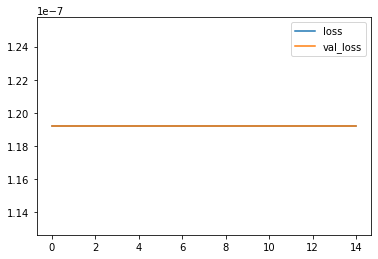

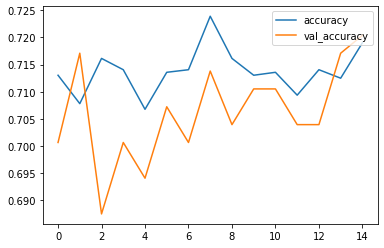

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

Saving 8.jpg to 8.jpg
[3.0454168e-34]
8.jpg ini adalah kuda


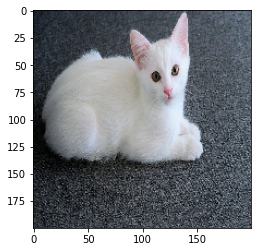

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes == 0:
    print(fn + " ini adalah kucing")
  elif classes == 1:
    print(fn + " ini adalah rusa")
  elif classes == 2:
    print(fn + " ini adalah anjing")
  else:
    print(fn + " ini adalah kuda")
 

**Transfer Learning**

In [ ]:
from keras.applications import vgg16, resnet

In [ ]:
#base model

base_model_1 = resnet.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

In [ ]:
base_model_1.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras import activations

In [ ]:
# lets add the final layers to our base model
model_1 = Sequential()
model_1.add(base_model_1)
model_1.add(Flatten())

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
#Add Dense Layer
model_1.add(Dense(128, activation=activations.relu))

model_1.add(Dropout(0.6))
model_1.add(Dense(4, activation='softmax'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 36,433,412
Trainable params: 36,380,292
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model_1.compile(loss='categorical_crossentropy', # untuk multi class classifcation
              optimizer='sgd', # optimizer -> update bobot
              metrics='accuracy' # evaluasi matrics
              )
checkpoint_filepath = '/content/best_model_vgg'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model_1.fit(
    train_generator, #prepared data
    batch_size = 70,
    epochs=5,
    validation_data=test_generator,
    shuffle=True,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/5
70/70 [==============================] - 66s 825ms/step - loss: 1.3510 - accuracy: 0.6464 - val_loss: 1.5582 - val_accuracy: 0.3214
Epoch 2/5
70/70 [==============================] - 55s 785ms/step - loss: 0.3867 - accuracy: 0.8616 - val_loss: 1.7904 - val_accuracy: 0.2500
Epoch 3/5
70/70 [==============================] - 56s 796ms/step - loss: 0.2727 - accuracy: 0.9107 - val_loss: 1.4785 - val_accuracy: 0.2500
Epoch 4/5
70/70 [==============================] - 55s 785ms/step - loss: 0.2626 - accuracy: 0.9152 - val_loss: 1.6822 - val_accuracy: 0.3250
Epoch 5/5
70/70 [==============================] - 56s 797ms/step - loss: 0.1816 - accuracy: 0.9335 - val_loss: 1.4376 - val_accuracy: 0.3036


In [ ]:
#pretrained model dari ImageNet dengan Arsiketur VGG16
model_1.evaluate(test_generator)

18/18 [==============================] - 17s 952ms/step - loss: 1.4247 - accuracy: 0.3268


[1.4246784448623657, 0.32678571343421936]

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
preds2 = model_1.predict(test_generator,
                      verbose=1)

18/18 [==============================] - 11s 553ms/step


Saving 7.jpg to 7 (3).jpg
[1.5562832e-06 3.8813241e-11 9.9999797e-01 4.6934213e-07]


ValueError: ignored

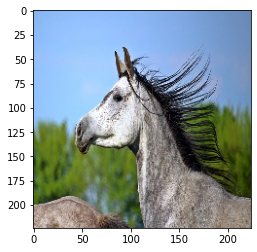

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model_1.predict(images, batch_size=10)
  print(classes[0])
  if classes == 0:
    print(fn + " ini adalah kucing")
  elif classes == 1:
    print(fn + " ini adalah rusa")
  elif classes == 2:
    print(fn + " ini adalah anjing")
  else:
    print(fn + " ini adalah kuda")
 